<a href="https://colab.research.google.com/github/Do-Nhat-Truong/AI-VietNam-Module5-week2/blob/main/Module5W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

In [1]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=992795c8-bd8d-43e3-acbc-ded65c5200fd
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 105MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

X.shape, y.shape

((284807, 30), (284807,))

In [8]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)


In [9]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [10]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [12]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [18]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc


In [19]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))


In [20]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")



EPOCH 1:	Training loss: 0.300	Validation loss: 0.222

EPOCH 2:	Training loss: 0.176	Validation loss: 0.137

EPOCH 3:	Training loss: 0.115	Validation loss: 0.094

EPOCH 4:	Training loss: 0.081	Validation loss: 0.069

EPOCH 5:	Training loss: 0.062	Validation loss: 0.054

EPOCH 6:	Training loss: 0.049	Validation loss: 0.044

EPOCH 7:	Training loss: 0.041	Validation loss: 0.037

EPOCH 8:	Training loss: 0.035	Validation loss: 0.033

EPOCH 9:	Training loss: 0.031	Validation loss: 0.029

EPOCH 10:	Training loss: 0.028	Validation loss: 0.026

EPOCH 11:	Training loss: 0.025	Validation loss: 0.024

EPOCH 12:	Training loss: 0.023	Validation loss: 0.022

EPOCH 13:	Training loss: 0.021	Validation loss: 0.020

EPOCH 14:	Training loss: 0.020	Validation loss: 0.019

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

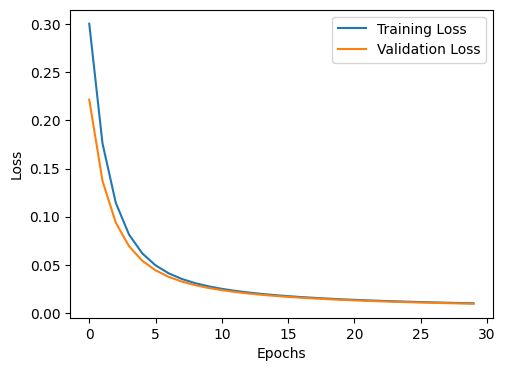

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

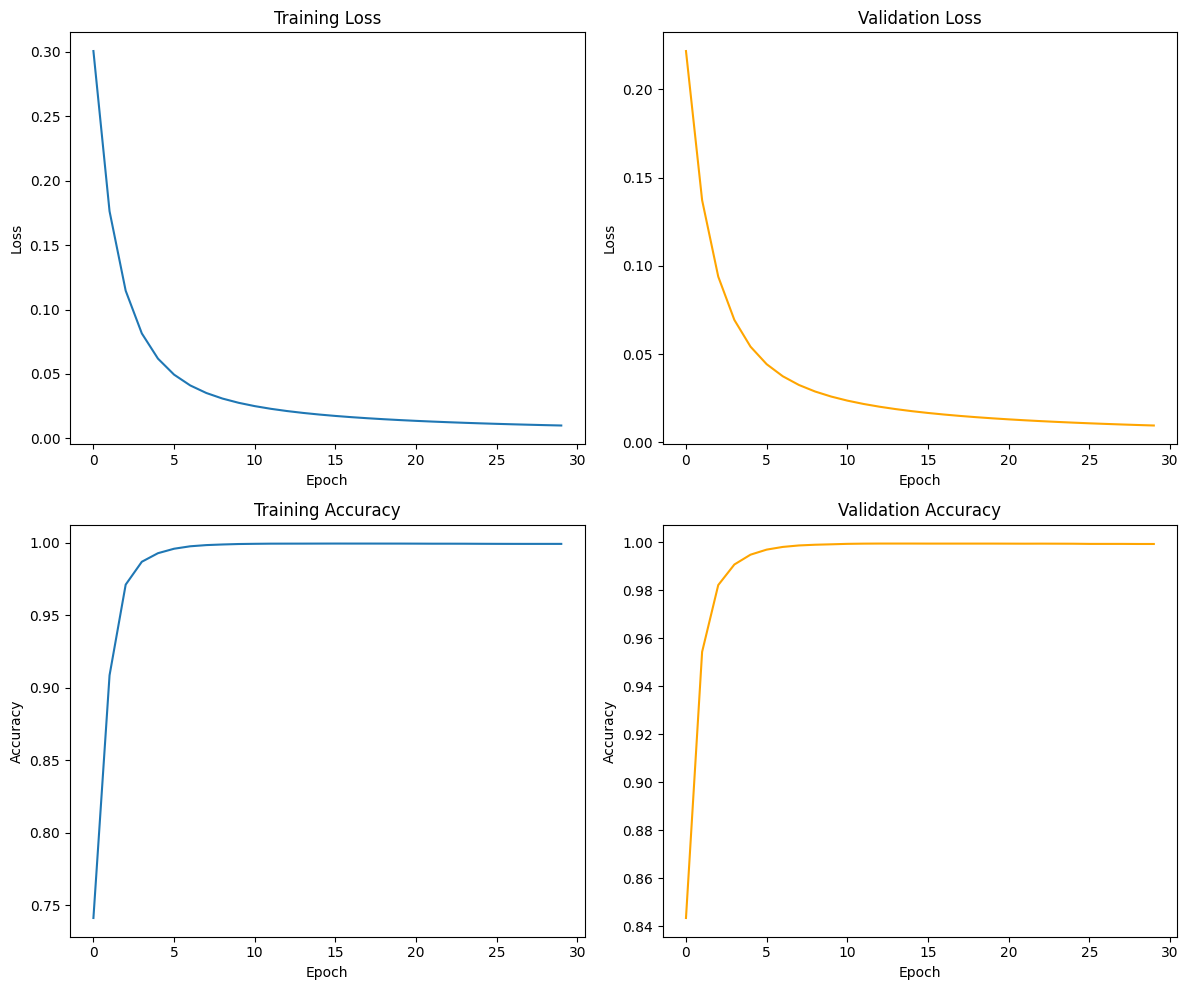

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()


# **Twitter Sentiment Analysis**

In [2]:
!gdown 1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt

Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 95.8MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(dataset_path)

df = df. dropna ()
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [6]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?://\S+', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text


In [7]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)


In [9]:

# Tìm các giá trị duy nhất trong cột 'category' và sắp xếp chúng
unique_categories = sorted(df['category'].unique())

# Tạo một từ điển ánh xạ để chuyển đổi các danh mục ban đầu thành 0, 1, 2...
category_mapping = {category: i for i, category in enumerate(unique_categories)}

# Áp dụng ánh xạ vào cột 'category' để tạo 'y'
y = df['category'].map(category_mapping).to_numpy()
y = y.astype(np.uint8)

# Bây giờ bạn có thể mã hóa one-hot 'y' như trước
n_classes = len(unique_categories)  # Cập nhật n_classes để phản ánh số lượng danh mục duy nhất thực tế
n_samples = df['category'].size

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1



In [10]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Chia tiếp dữ liệu huấn luyện thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [11]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc


In [12]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))


In [13]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")



EPOCH 1:	Training loss: 0.377	Validation loss: 0.376

EPOCH 2:	Training loss: 0.377	Validation loss: 0.376

EPOCH 3:	Training loss: 0.377	Validation loss: 0.376

EPOCH 4:	Training loss: 0.376	Validation loss: 0.375

EPOCH 5:	Training loss: 0.376	Validation loss: 0.375

EPOCH 6:	Training loss: 0.376	Validation loss: 0.375

EPOCH 7:	Training loss: 0.375	Validation loss: 0.374

EPOCH 8:	Training loss: 0.375	Validation loss: 0.374

EPOCH 9:	Training loss: 0.375	Validation loss: 0.374

EPOCH 10:	Training loss: 0.374	Validation loss: 0.373

EPOCH 11:	Training loss: 0.374	Validation loss: 0.373

EPOCH 12:	Training loss: 0.374	Validation loss: 0.373

EPOCH 13:	Training loss: 0.374	Validation loss: 0.373

EPOCH 14:	Training loss: 0.373	Validation loss: 0.372

EPOCH 15:	Training loss: 0.373	Validation loss: 0.372

EPOCH 16:	Training loss: 0.373	Validation loss: 0.372

EPOCH 17:	Training loss: 0.372	Validation loss: 0.372

EPOCH 18:	Training loss: 0.372	Validation loss: 0.371

EPOCH 19:	Training

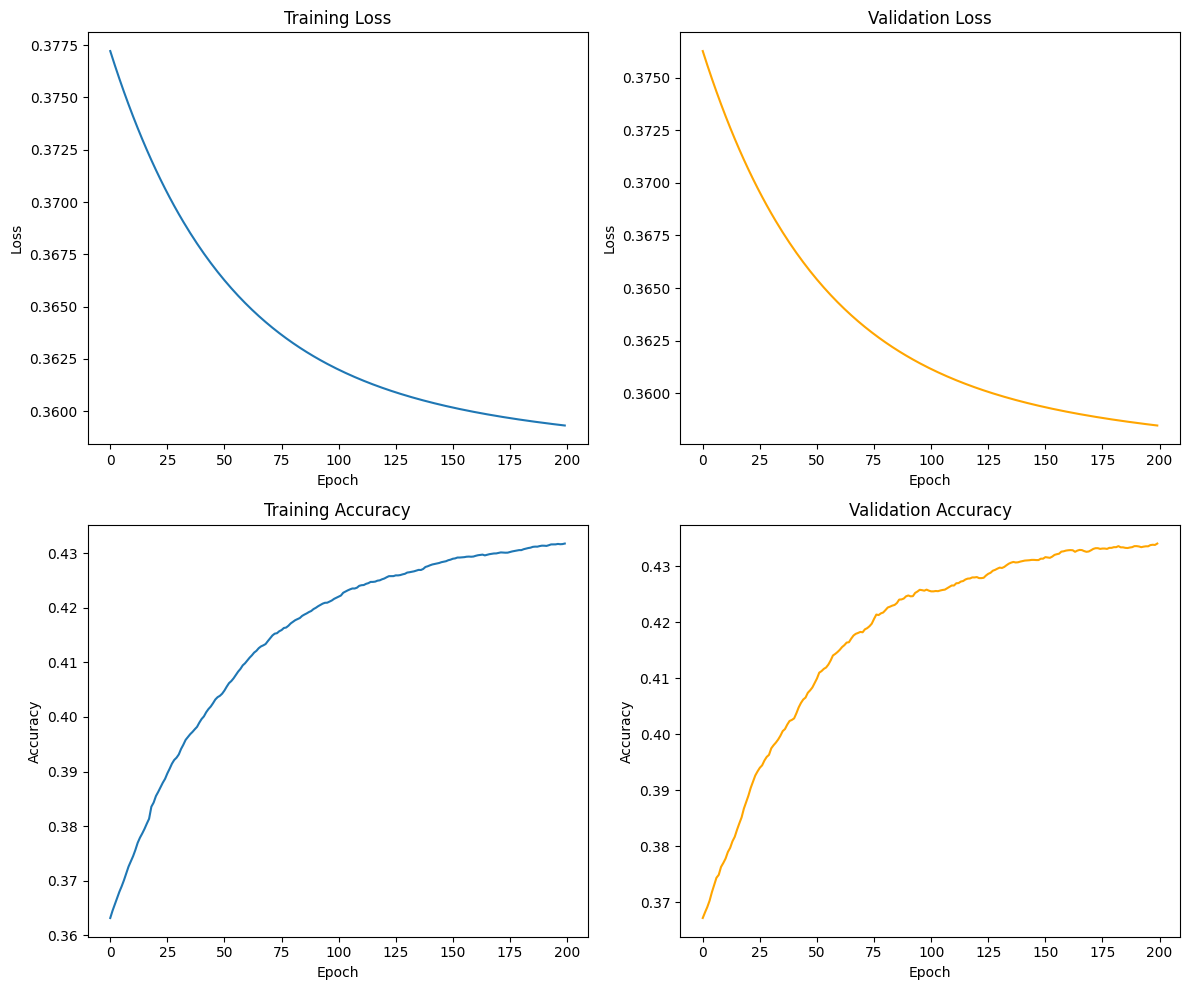

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()